In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dat12Jan2021.csv')
df.head()


,longitude,latitude,noisedB,seconds
0,27.091134,93.615735,63.283447,1610437001
1,27.091134,93.615735,63.283447,1610437001
2,27.091121,93.615755,60.112976,1610437002
3,27.091121,93.615755,58.297077,1610437003
4,27.091121,93.615755,61.898243,1610437004


In [3]:
df =df[['longitude','latitude','seconds','noisedB']]

In [4]:
df.head()

,longitude,latitude,seconds,noisedB
0,27.091134,93.615735,1610437001,63.283447
1,27.091134,93.615735,1610437001,63.283447
2,27.091121,93.615755,1610437002,60.112976
3,27.091121,93.615755,1610437003,58.297077
4,27.091121,93.615755,1610437004,61.898243


In [5]:
x = df.iloc[:,0:3]
x

,longitude,latitude,seconds
0,27.091134,93.615735,1610437001
1,27.091134,93.615735,1610437001
2,27.091121,93.615755,1610437002
3,27.091121,93.615755,1610437003
4,27.091121,93.615755,1610437004
...,...,...,...
1105,27.091154,93.615827,1610438821
1106,27.091156,93.615821,1610438822
1107,27.091157,93.615819,1610438823
1108,27.091161,93.615817,1610438824


In [6]:
y = df.iloc[:,3:4]
y

,noisedB
0,63.283447
1,63.283447
2,60.112976
3,58.297077
4,61.898243
...,...
1105,75.734497
1106,69.763222
1107,78.343590
1108,75.700264


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_features=1, n_estimators=100, random_state = 0)
regressor.fit(x_train,y_train.ravel())
y_pred = regressor.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse

0.10147073886506221

In [14]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,3,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(x_train,y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [16]:
print("The best parameters are %s"
      % (grid_search.best_params_))

The best parameters are {'max_features': 2, 'n_estimators': 40}


In [17]:
final_model = grid_search.best_estimator_


final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mse

0.0948178837104013

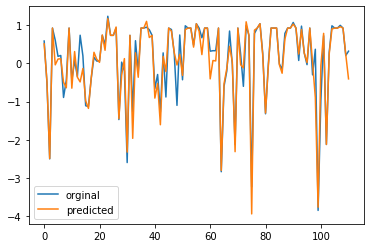

In [18]:
import matplotlib.pyplot as plt
plt.plot(y_test,label = "orginal")
plt.plot(final_predictions, label = "predicted")
plt.legend()
plt.show()